<a href="https://colab.research.google.com/github/LikhanBiswas/CNN-Models/blob/main/Copy_of_Copy_of_custom_cnn_model%20exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
from keras import models
import keras
from keras import regularizers

In [3]:
my_model= models.Sequential()

In [5]:
# Add first convolutional block
my_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(215,215,3)))
my_model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))

# second block
my_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2),strides=(2,2), padding='same'))
# third block
my_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))
# fourth block
my_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#my_model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))
#fifth block
my_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
my_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))
#sixth block
my_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
my_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
my_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))
#seventh block
my_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
my_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
my_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), strides=(2,2), padding='same'))

In [6]:
my_model.add(GlobalAveragePooling2D())
# fully connected layer
my_model.add(Dense(64, activation='relu'))
my_model.add(Dense(64, activation='relu'))
my_model.add(BatchNormalization())
# make predictions
my_model.add(Dense(1, activation='sigmoid'))


In [7]:
# Show a summary of the model. Check the number of trainable parameters
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 215, 215, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)      

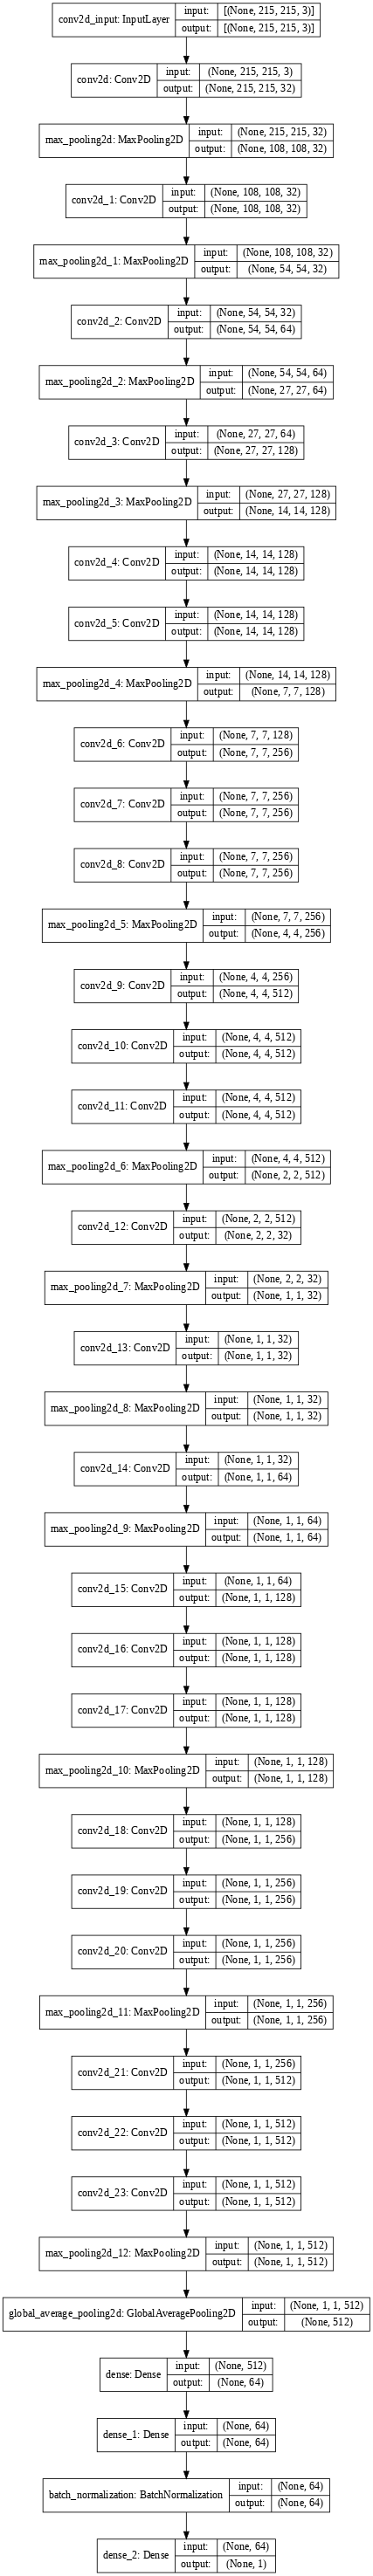

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(my_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi = 60)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# save best model automatically
#mc= ModelCheckpoint('/content/drive/MyDrive/extension/custom_cnn.h5', monitor='val_loss', 
                    #mode='min', verbose=1, save_best_only=True)
#cb_list=[es,mc]

In [13]:
#x = Flatten()(my_model.output)
#prediction = Dense(1, activation='sigmoid')(x)


In [14]:
for layer in my_model.layers:
    layer.kernel_regularizer = keras.regularizers.l1_l2(0.01)

In [15]:
my_model.compile(optimizer='adam', loss='binary_crossentropy', 
                 metrics=['accuracy'])

In [16]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# set up data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


In [17]:
train_path = '/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K'
valid_path = '/content/drive/MyDrive/real vs fake/test'

In [18]:
data_generator = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range=0.1,
                                   rotation_range=90,
                                   width_shift_range=0.1,
                                   #fill_mode='wrap',
                                   height_shift_range=0.1,
                                   #channel_shift_range=150.0,
                                   brightness_range=(0.1, 0.5),
                                   vertical_flip=True,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# get batches of training images from the directory
train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K',
        target_size=(215, 215),
        batch_size=32,
        class_mode='binary')

# get batches of validation images from the directory
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/real vs fake/test',
        target_size=(215, 215),
        batch_size=32,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [20]:
history = my_model.fit(
        train_generator,
        epochs=20,
        steps_per_epoch=len(train_generator),
        validation_data=validation_generator,
        validation_steps=66)

Epoch 1/20
313/313 [==============================] - 6621s 21s/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 2/20
313/313 [==============================] - 521s 2s/step - loss: 0.6933 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.5028
Epoch 3/20
313/313 [==============================] - 270s 865ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6942 - val_accuracy: 0.4929
Epoch 4/20
313/313 [==============================] - 198s 633ms/step - loss: 0.6933 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.5033
Epoch 5/20
313/313 [==============================] - 174s 557ms/step - loss: 0.6933 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5099
Epoch 6/20
313/313 [==============================] - 166s 532ms/step - loss: 0.6899 - accuracy: 0.5046 - val_loss: 119.4302 - val_accuracy: 0.5123
Epoch 7/20
313/313 [==============================] - 169s 539ms/step - loss: 0.2159 - accuracy: 0.9088 - val_loss: 1.0140 - v

In [21]:
import matplotlib.pyplot as plt

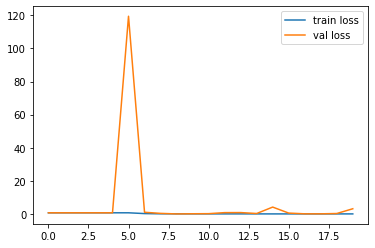

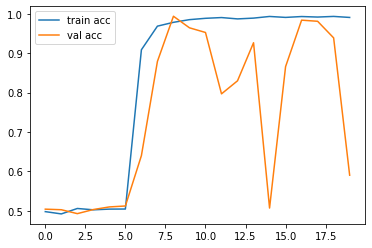

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')